<a href="https://colab.research.google.com/github/gingerchien/ML-Intro/blob/main/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Necessary Libraries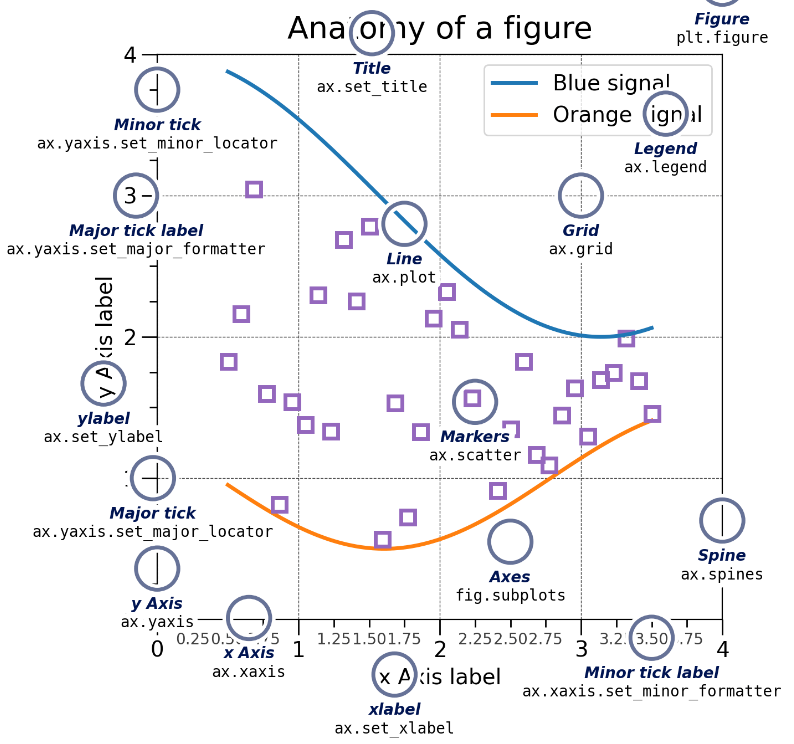

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

### Simple Example
Matplotlib graphs data on Figures (e.g., windows, Jupyter widgets, etc.), each of which can contain one or more Axes, an area where points can be specified in terms of x-y coordinates (or theta-r in a polar plot, x-y-z in a 3D plot, etc.). The simplest way of creating a Figure with an Axes is using pyplot.subplots. We can then use Axes.plot to draw some data on the Axes:

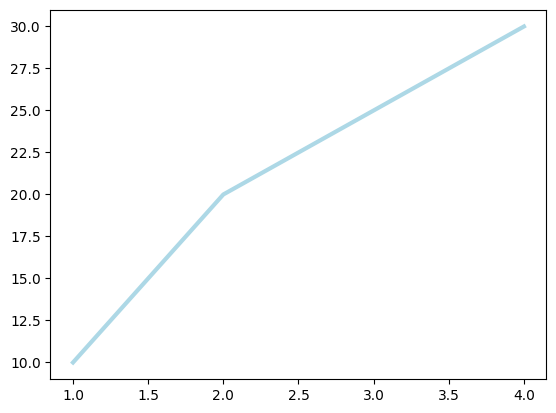

In [4]:
fig, ax = plt.subplots() #create a figure containing a single axes
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3) #plot some data on the axes
plt.show() #depending on backend may need to call this to show plot

# Figure
The whole figure. The Figure keeps track of all the child Axes, a group of 'special' Artists (titles, figure legends, colorbars, etc), and even nested subfigures.It is often convenient to create the Axes together with the Figure, but you can also manually add Axes later on. Note that many Matplotlib backends support zooming and panning on figure windows.

The easiest way to create a new Figure is with pyplot:

<Figure size 640x480 with 0 Axes>

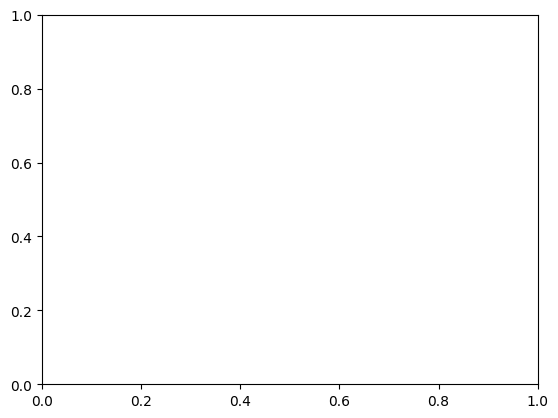

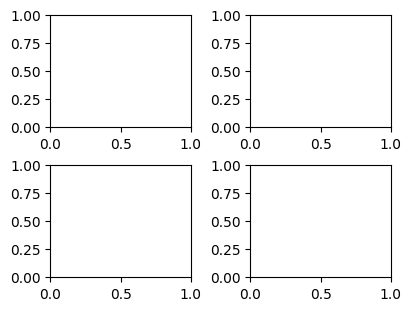

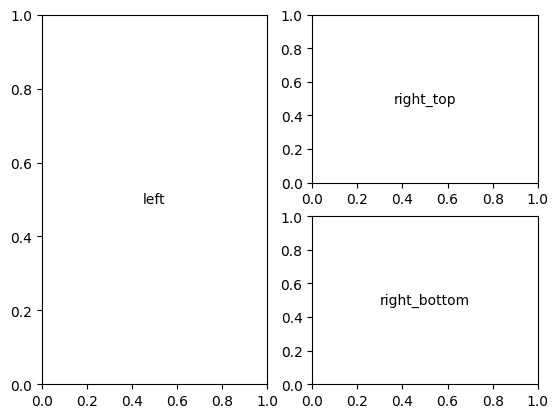

In [10]:
fig = plt.figure() #an empty figure with no Axes
fig, ax = plt.subplots() #create a figure containing a single axes
fig, axs = plt.subplots(2, 2, figsize=(4,3), layout='constrained') #create figure and axes in a 2x2 grid
#more complex grids like a figure with one axes on the left, and two on the right can be done with subplot_mosaic:
fig, axs = plt.subplot_mosaic([['left','right_top'], ['left','right_bottom']])
for ax_name, ax in axs.items():
    ax.text(0.5, 0.5, ax_name, ha='center', va='center')

## Intro to Figures
When looking at Matplotlib visualization, you are almost always looking at Artists placed on a Figure. In the example above, the figure is the blue region and add_subplot has added an Axes artist to the Figure (see Parts of a Figure). A more complicated visualization can add multiple Axes to the Figure, colorbars, legends, annotations, and the Axes themselves can have multiple Artists added to them (e.g. ax.plot or ax.imshow).

Text(0.0, 1.0, 'Axes')

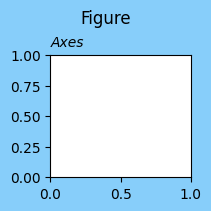

In [8]:
fig = plt.figure(figsize=(2,2), facecolor='lightskyblue',
                 layout = 'constrained')
fig.suptitle('Figure')
ax = fig.add_subplot()
ax.set_title('Axes', loc='left', fontstyle='oblique', fontsize='medium')

Sometimes we want to have a nested layout in a Figure, with two or more sets of Axes that do not share the same subplot grid. We can use add_subfigure or subfigures to create virtual figures inside a parent Figure; see Figure subfigures for more details.

Text(0.5, 0.98, 'Right subfigure')

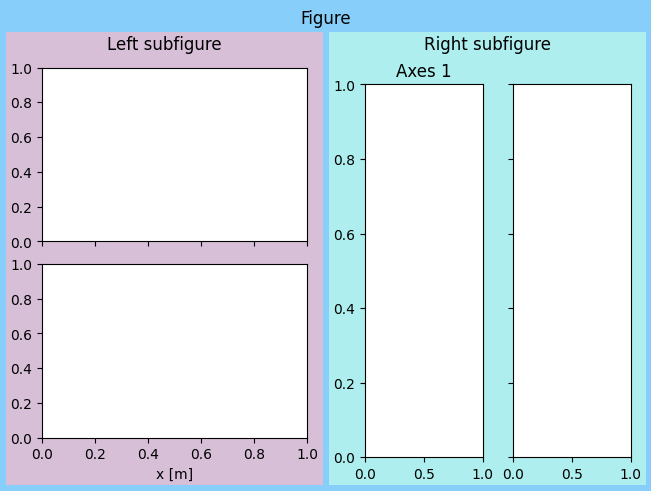

In [12]:
fig = plt.figure(layout='constrained', facecolor='lightskyblue')
fig.suptitle('Figure')
figL, figR = fig.subfigures(1,2)
figL.set_facecolor('thistle')
axL = figL.subplots(2,1, sharex=True)
axL[1].set_xlabel('x [m]')
figL.suptitle('Left subfigure')
figR.set_facecolor('paleturquoise')
axR = figR.subplots(1,2,sharey=True)
axR[0].set_title('Axes 1')
figR.suptitle('Right subfigure')

The Figure size on the screen is set by figsize and dpi. figsize is the (width, height) of the Figure in inches (or, if preferred, units of 72 typographic points). dpi are how many pixels per inch the figure will be rendered at. To make your Figures appear on the screen at the physical size you requested, you should set dpi to the same dpi as your graphics system. Note that many graphics systems now use a "dpi ratio" to specify how many screen pixels are used to represent a graphics pixel. Matplotlib applies the dpi ratio to the dpi passed to the figure to make it have higher resolution, so you should pass the lower number to the figure.

The facecolor, edgecolor, linewidth, and frameon options all change the appearance of the figure in expected ways, with frameon making the figure transparent if set to False.

Finally, the user can specify a layout engine for the figure with the layout parameter. Currently Matplotlib supplies "constrained", "compressed" and "tight" layout engines. These rescale axes inside the Figure to prevent overlap of ticklabels, and try and align axes, and can save significant manual adjustment of artists on a Figure for many common cases.

## Saving Figures

Figures can be saved to disk using the savefig method. fig.savefig('MyFigure.png', dpi=200) will save a PNG formatted figure to the file MyFigure.png in the current directory on disk with 200 dots-per-inch resolution. Note that the filename can include a relative or absolute path to any place on the file system.

Many types of output are supported, including raster formats like PNG, GIF, JPEG, TIFF and vector formats like PDF, EPS, and SVG.

By default, the size of the saved Figure is set by the Figure size (in inches) and, for the raster formats, the dpi. If dpi is not set, then the dpi of the Figure is used. Note that dpi still has meaning for vector formats like PDF if the Figure includes Artists that have been rasterized; the dpi specified will be the resolution of the rasterized objects.

In [14]:
fig.savefig('MyFigure.png', dpi=200)

#Axes
An Axes is an Artist attached to a Figure that contains a region for plotting data, and usually includes two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) that provide ticks and tick labels to provide scales for the data in the Axes. Each Axes also has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()).

The Axes class and its member functions are the primary entry point to working with the OOP interface, and have most of the plotting methods defined on them (e.g. ax.plot(), shown above, uses the plot method)


# Axis
These objects set the scale and limits and generate ticks (the marks on the Axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

# Artist
Basically, everything visible on the Figure is an Artist (even Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collections objects, Patch objects, etc. When the Figure is rendered, all of the Artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

# Types of inputs to plotting functions
Plotting functions expect numpy.array or numpy.ma.masked_array as input, or objects that can be passed to numpy.asarray. Classes that are similar to arrays ('array-like') such as pandas data objects and numpy.matrix may not work as intended. Common convention is to convert these to numpy.array objects prior to plotting. For example, to convert a numpy.matrix

In [15]:
b = np.matrix([[1, 2, 3], [4, 5, 6]])
b_asarray = np.asarray(b)

Most methods will also parse a string-indexable object like a dict, a structured numpy array, or a pandas.DataFrame. Matplotlib allows you to provide the data keyword argument and generate plots passing the strings corresponding to the x and y variables.

Text(0, 0.5, 'entry b')

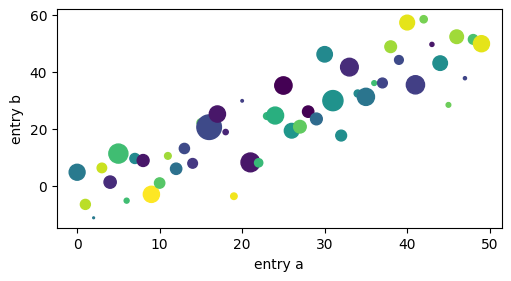

In [16]:
np.random.seed(19680801) #seed the random number generator
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig,ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

# Coding Styles
2 ways to use Matplotlib:

* explicitly create Figures and Axes, and call methods on them (the OO style)
* rely on pyplot to implicitly create and manage the Figures and Axes, and use pyplot functions for plotting

## OO Style

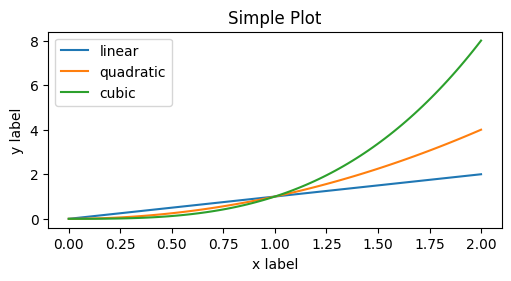

In [18]:
x = np.linspace(0, 2, 100) #sample data

#even in the OO-style, use .pyplot.figure to create the Figure
fig, ax = plt.subplots(figsize=(5,2.7), layout='constrained')
ax.plot(x,x,label='linear') #Plot some data on the axes
ax.plot(x, x**2, label='quadratic') #Plot more data on the axes
ax.plot(x, x**3, label='cubic') #Plot more data on the axes
ax.set_xlabel('x label') # add x label
ax.set_ylabel('y label') # add y label
ax.set_title("Simple Plot") # add title
ax.legend() #add legend

## Pyplot Style

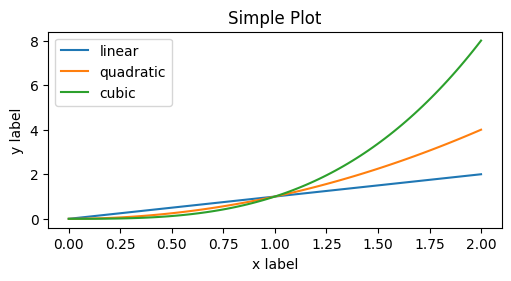

In [19]:
x = np.linspace(0, 2, 100) #sample data

plt.figure(figsize=(5,2.7), layout='constrained')
plt.plot(x,x,label='linear') #Plot some data on the axes
plt.plot(x, x**2, label='quadratic') #Plot more data on the axes
plt.plot(x, x**3, label='cubic') #Plot more data on the axes
plt.xlabel('x label') # add x label
plt.ylabel('y label') # add y label
plt.title("Simple Plot") # add title
plt.legend() #add legend

# Making a helper function

In [20]:
def my_plotter(ax, data1, data2, param_dict):
  """
  A simple function to plot some data.
  """
  out = ax.plot(data1, data2, **param_dict)
  return out

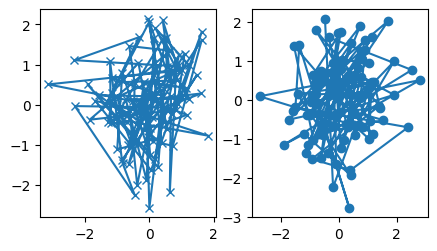

In [21]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

# Styling Artists
Most plotting methods have styling options for the Artists, accessible either when a plotting method is called, or from a "setter" on the Artist. In the plot below we manually set the color, linewidth, and linestyle of the Artists created by plot, and we set the linestyle of the second line after the fact with set_linestyle.

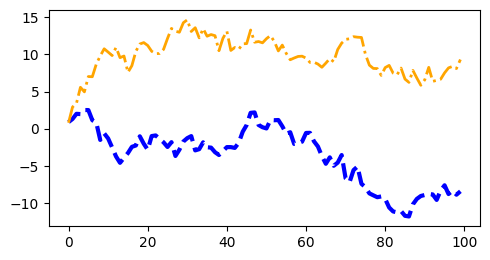

In [26]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='tight')
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle('-.')

# Colors
https://matplotlib.org/stable/users/explain/colors/colors.html#colors-def

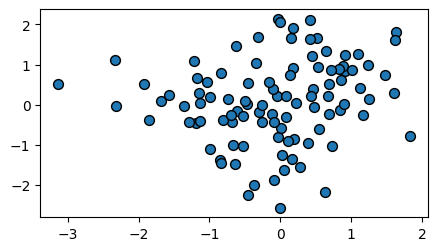

In [27]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor='C0', edgecolor='k')

# Linewidths, linestyles, and markersizes

Line widths are typically in typographic points (1 pt = 1/72 inch) and available for Artists that have stroked lines. Similarly, stroked lines can have a linestyle. See the linestyles example.

https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html

Marker size depends on the method being used. plot specifies markersize in points, and is generally the "diameter" or width of the marker. scatter specifies markersize as approximately proportional to the visual area of the marker. There is an array of markerstyles available as string codes (see markers), or users can define their own MarkerStyle (see Marker reference):

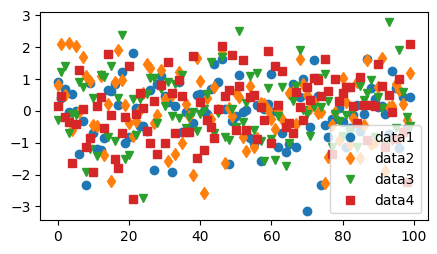

In [28]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend()

# Labelling Plots

set_xlabel, set_ylabel, and set_title are used to add text in the indicated locations (see Text in Matplotlib for more discussion). Text can also be directly added to plots using text:

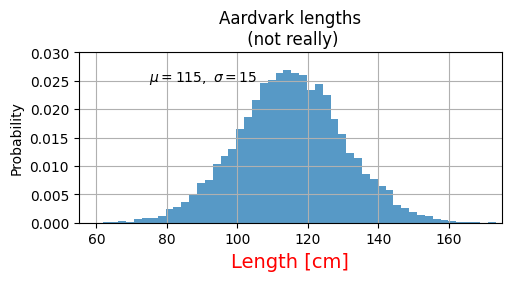

In [32]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]', fontsize=14, color='red')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True)

# Using mathematical expressions in text
Matplotlib accepts TeX equation expressions in any text expression. For example to write the expression
 in the title, you can write a TeX expression surrounded by dollar signs:

In [33]:
ax.set_title(r'$\sigma_i=15$')

Text(0.5, 1.0, '$\\sigma_i=15$')

# Annotations
We can also annotate points on a plot, often by connecting an arrow pointing to xy, to a piece of text at xytext. In this basic example, both xy and xytext are in data coordinates. There are a variety of other coordinate systems one can choose -- see Basic annotation and Advanced annotation for details.
https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html:

(-2.0, 2.0)

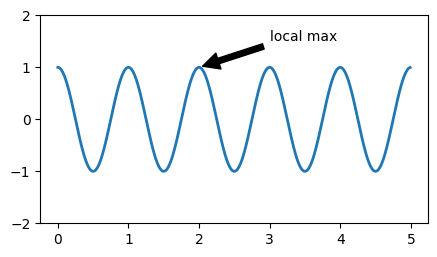

In [34]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2)

# Legends
Legends in Matplotlib are quite flexible in layout, placement, and what Artists they can represent. They are discussed in detail in Legend guide.
https://matplotlib.org/stable/users/explain/axes/legend_guide.html#legend-guide

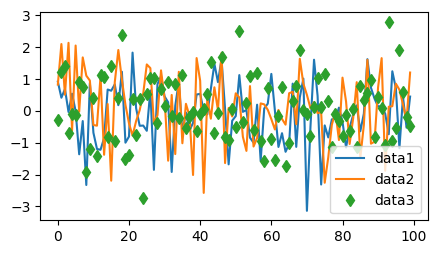

In [35]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend()

# Axis Scales and Ticks
Each Axes has two (or three) Axis objects representing the x- and y-axis. These control the scale of the Axis, the tick locators and the tick formatters. Additional Axes can be attached to display further Axis objects.

## Scales
In addition to the linear scale, Matplotlib supplies non-linear scales, such as a log-scale. Since log-scales are used so much there are also direct methods like loglog, semilogx, and semilogy. There are a number of scales (see Scales for other examples). Here we set the scale manually:
https://matplotlib.org/stable/gallery/scales/scales.html

The scale sets the mapping from data values to spacing along the Axis. This happens in both directions, and gets combined into a transform, which is the way that Matplotlib maps from data coordinates to Axes, Figure, or screen coordinates. See Transformations Tutorial.

https://matplotlib.org/stable/users/explain/artists/transforms_tutorial.html#transforms-tutorial

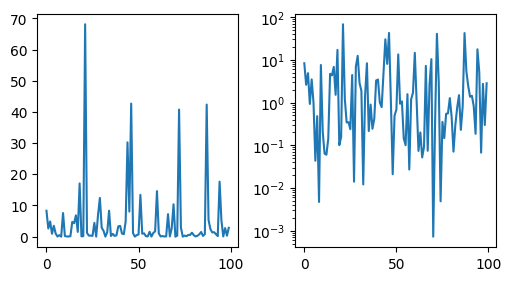

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout='constrained')
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data)

# Tick locators and formatters
Each Axis has a tick locator and formatter that choose where along the Axis objects to put tick marks. A simple interface to this is set_xticks:

Different scales can have different locators and formatters; for instance the log-scale above uses LogLocator and LogFormatter. See Tick locators and Tick formatters for other formatters and locators and information for writing your own.

Text(0.5, 1.0, 'Manual ticks')

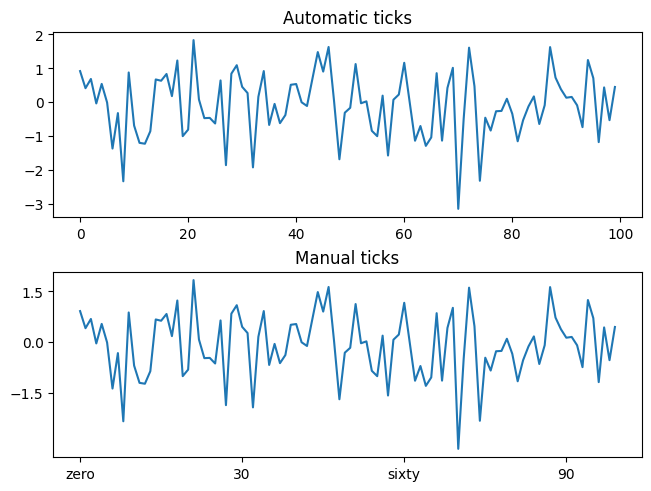

In [37]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title('Manual ticks')

# Plotting Dates and Strings
Matplotlib can handle plotting arrays of dates and arrays of strings, as well as floating point numbers. These get special locators and formatters as appropriate. For dates:

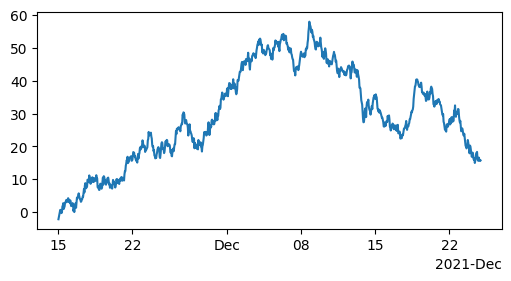

In [38]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                  np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf)

For more information see the date examples (e.g. Date tick labels)
https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html

For strings, we get categorical plotting (see: Plotting categorical variables).
https://matplotlib.org/stable/gallery/lines_bars_and_markers/categorical_variables.html

One caveat about categorical plotting is that some methods of parsing text files return a list of strings, even if the strings all represent numbers or dates. If you pass 1000 strings, Matplotlib will think you meant 1000 categories and will add 1000 ticks to your plot!

<BarContainer object of 4 artists>

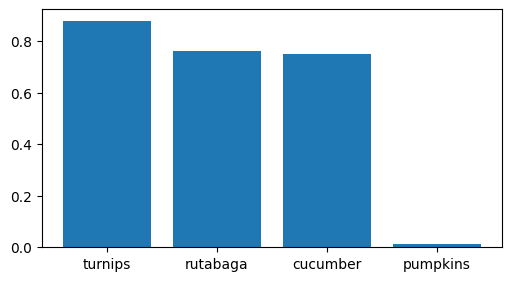

In [40]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
categories = ['turnips', 'rutabaga', 'cucumber', 'pumpkins']

ax.bar(categories, np.random.rand(len(categories)))

# Additional Axis Objects

Plotting data of different magnitude in one chart may require an additional y-axis. Such an Axis can be created by using twinx to add a new Axes with an invisible x-axis and a y-axis positioned at the right (analogously for twiny). See Plots with different scales for another example.

Similarly, you can add a secondary_xaxis or secondary_yaxis having a different scale than the main Axis to represent the data in different scales or units. See Secondary Axis for further examples.

Text(0.5, 0, 'Angle [°]')

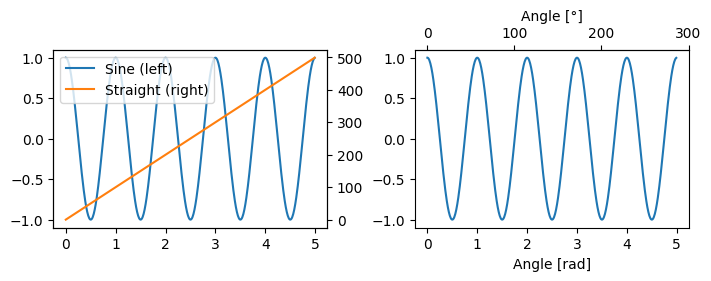

In [41]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 2.7), layout='constrained')
l1, = ax1.plot(t, s)
ax2 = ax1.twinx()
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [rad]')
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [°]')

# Color mapped data
Often we want to have a third dimension in a plot represented by a colors in a colormap. Matplotlib has a number of plot types that do this:

Text(0.5, 1.0, 'scatter()')

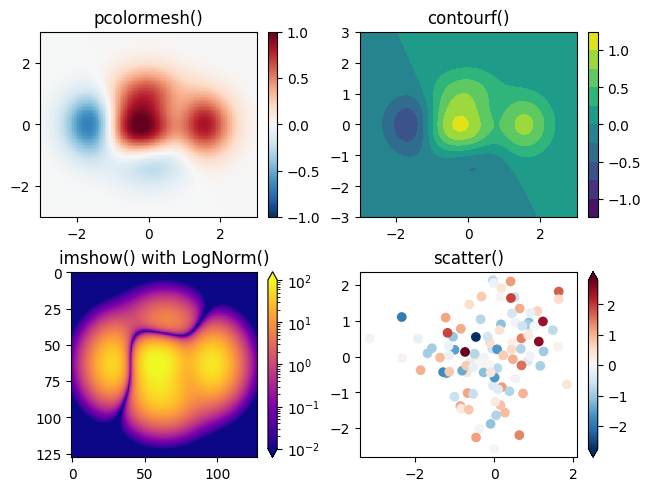

In [42]:
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, layout='constrained')
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma',
                          norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()')

# Colormaps

These are all examples of Artists that derive from ScalarMappable objects. They all can set a linear mapping between vmin and vmax into the colormap specified by cmap. Matplotlib has many colormaps to choose from (Choosing Colormaps) you can make your own (Creating Colormaps) or download as third-party packages.

https://matplotlib.org/stable/api/cm_api.html#matplotlib.cm.ScalarMappable

https://matplotlib.org/stable/users/explain/colors/colormaps.html#colormaps

# Colorbars
Adding a colorbar gives a key to relate the color back to the underlying data. Colorbars are figure-level Artists, and are attached to a ScalarMappable (where they get their information about the norm and colormap) and usually steal space from a parent Axes. Placement of colorbars can be complex: see Placing Colorbars for details. You can also change the appearance of colorbars with the extend keyword to add arrows to the ends, and shrink and aspect to control the size. Finally, the colorbar will have default locators and formatters appropriate to the norm. These can be changed as for other Axis objects.